<a href="https://colab.research.google.com/github/EdgarAgOr/FAP_Cheminformatic_PET/blob/main/5_EDA_Bemis_Murcko_Scaffolds_FAP_BindingSite_(Actives).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Bioactividad_FAPBSITE_curada_activos_data.csv')

In [ ]:
df

,BindingDB_id,SMILES,bioactivity_class,IC50_nM,Data Set,Smiles standarization,Patente
0,22043,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,16985.0,Bsite,Nope,No
1,22044,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,13609.0,Bsite,Nope,No
2,22045,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,7951.0,Bsite,Nope,No
3,22046,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,20001.0,Bsite,Nope,No
4,22047,Cc1cc(CN(C2)C([C@@H](C3)CN[C@@H]3C(N3CCCC3)=O)...,Active,8803.0,Bsite,Nope,No
...,...,...,...,...,...,...,...
814,51084563,Cc1ccc(C[C@H](N)C(=O)N2C[C@@H](F)C[C@H]2C#N)cc1,Active,470.0,Bsite,Nope,No
815,51084566,N#C[C@@H]1C[C@H](F)CN1C(=O)[C@@H](N)Cc1ccc(F)cc1,Active,82.0,Bsite,Nope,No
816,51494188,N#C[C@@H]1CCCN1C(=O)[C@@H]1CCCN1C(=O)CCCc1ccccc1,Active,101.0,Bsite,Nope,No
817,51494189,C[C@@H](C(N1[C@@H](B(O)O)CCC1)=O)NC(c1ccncc1)=O,Active,36.0,Bsite,Nope,No


In [ ]:
# Estas son para analisis y visualizacion

import seaborn as sns

import matplotlib.pyplot as plt


In [ ]:
# Estas son para quimioinformatica

import pandas as pd
! pip install -q rdkit
! pip install -q molvs

import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from molvs.standardize import Standardizer
from molvs.charge import Uncharger, Reionizer
from molvs.fragment import LargestFragmentChooser
from molvs.tautomer import TautomerCanonicalizer
from rdkit.Chem.rdmolops import GetFormalCharge, RemoveStereochemistry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from rdkit.Chem import AllChem

from rdkit.Chem import PandasTools

from rdkit.Chem import Descriptors

PandasTools.RenderImagesInAllDataFrames (images = True)

In [ ]:
print (f'DtaFrame shape: {df.shape}.')

df

DtaFrame shape: (819, 7).


,BindingDB_id,SMILES,bioactivity_class,IC50_nM,Data Set,Smiles standarization,Patente
0,22043,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,16985.0,Bsite,Nope,No
1,22044,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,13609.0,Bsite,Nope,No
2,22045,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,7951.0,Bsite,Nope,No
3,22046,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,20001.0,Bsite,Nope,No
4,22047,Cc1cc(CN(C2)C([C@@H](C3)CN[C@@H]3C(N3CCCC3)=O)...,Active,8803.0,Bsite,Nope,No
...,...,...,...,...,...,...,...
814,51084563,Cc1ccc(C[C@H](N)C(=O)N2C[C@@H](F)C[C@H]2C#N)cc1,Active,470.0,Bsite,Nope,No
815,51084566,N#C[C@@H]1C[C@H](F)CN1C(=O)[C@@H](N)Cc1ccc(F)cc1,Active,82.0,Bsite,Nope,No
816,51494188,N#C[C@@H]1CCCN1C(=O)[C@@H]1CCCN1C(=O)CCCc1ccccc1,Active,101.0,Bsite,Nope,No
817,51494189,C[C@@H](C(N1[C@@H](B(O)O)CCC1)=O)NC(c1ccncc1)=O,Active,36.0,Bsite,Nope,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BindingDB_id           819 non-null    int64  
 1   SMILES                 819 non-null    object 
 2   bioactivity_class      819 non-null    object 
 3   IC50_nM                819 non-null    float64
 4   Data Set               819 non-null    object 
 5   Smiles standarization  819 non-null    object 
 6   Patente                819 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 44.9+ KB


,BindingDB_id,SMILES,bioactivity_class,IC50_nM,Data Set,Smiles standarization,Patente,ROMol
0,22043,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,16985.0,Bsite,Nope,No,
1,22044,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,13609.0,Bsite,Nope,No,
2,22045,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,7951.0,Bsite,Nope,No,
3,22046,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,20001.0,Bsite,Nope,No,
4,22047,Cc1cc(CN(C2)C([C@@H](C3)CN[C@@H]3C(N3CCCC3)=O)...,Active,8803.0,Bsite,Nope,No,

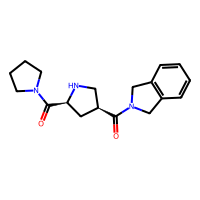
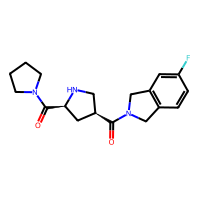
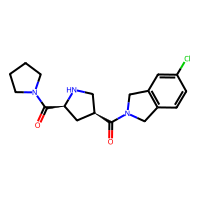
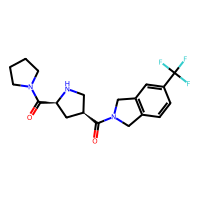
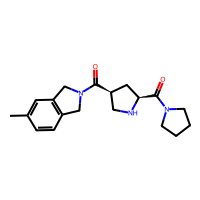

In [ ]:
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES')
# con esto mostramos solo las primeras cinco lineas
df [0:5]

In [ ]:
df ['MW']= df['ROMol'].apply(Descriptors.ExactMolWt)

,BindingDB_id,SMILES,bioactivity_class,IC50_nM,Data Set,Smiles standarization,Patente,ROMol,MW
0,22043,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,16985.0,Bsite,Nope,No,,313.179027
1,22044,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,13609.0,Bsite,Nope,No,,331.169605
2,22045,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,7951.0,Bsite,Nope,No,,347.140055
3,22046,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,20001.0,Bsite,Nope,No,,381.166412

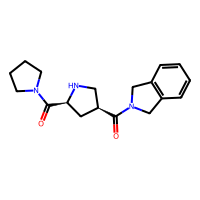
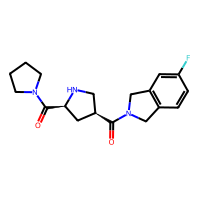
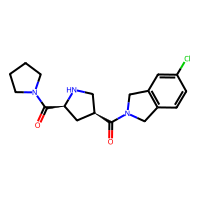
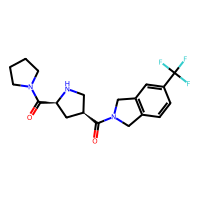

In [ ]:
df [0:4]

Vamos a determinar otros descriptores moleculares

,MW,logP,TPSA,HBA,HBD,CSP3,NumRings,RotBonds,ROMol
0,313.401,1.1293,52.65,3,1,0.555556,4,2,
1,331.391,1.2684,52.65,3,1,0.555556,4,2,
2,347.846,1.7827,52.65,3,1,0.555556,4,2,

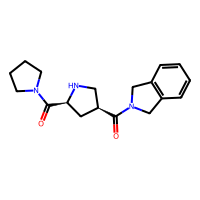
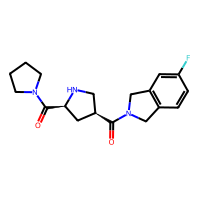
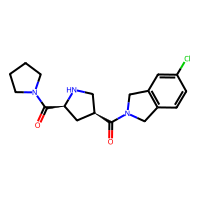

In [ ]:
df["HBA"] = df["ROMol"].apply(Descriptors.NumHAcceptors)
df["HBD"] = df["ROMol"].apply(Descriptors.NumHDonors)
df["logP"] = df["ROMol"].apply(Descriptors.MolLogP)
df["TPSA"] = df["ROMol"].apply(Descriptors.TPSA)
df["CSP3"] = df["ROMol"].apply(Descriptors.FractionCSP3)
df["NumRings"] = df["ROMol"].apply(Descriptors.RingCount)
#df["HetAtoms"] = df["ROMol"].apply(Descriptors.NumHeteroatoms)
df["RotBonds"]= df["ROMol"].apply(Descriptors.NumRotatableBonds)
df["ARR"]= df["ROMol"].apply(Descriptors.NumAromaticRings)
#df["ALR"]= df["ROMol"].apply(Descriptors.NumAliphaticRings)
df["MW"]= df["ROMol"].apply(Descriptors.MolWt)


df [['MW','logP','TPSA','HBA','HBD','CSP3','NumRings','RotBonds','ROMol',]] [0:3]

In [ ]:
df.describe()

,BindingDB_id,IC50_nM,MW,HBA,HBD,logP,TPSA,CSP3,NumRings,RotBonds,ARR
count,8.190000e+02,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,2.138193e+07,16203.160535,448.103216,6.101343,2.286935,1.465839,113.021722,0.506338,3.468864,6.336996,1.590965
std,2.422659e+07,43038.739979,176.767767,3.364671,2.467780,2.435385,72.506979,0.170845,1.134024,5.691433,0.956239
min,2.204300e+04,0.024900,171.993000,2.000000,0.000000,-9.192500,29.260000,0.153846,0.000000,1.000000,0.000000
25%,1.326926e+06,0.395000,352.419000,4.000000,1.000000,1.044090,80.500000,0.400000,3.000000,4.000000,1.000000
50%,1.327438e+06,428.000000,423.542000,5.000000,1.000000,2.035900,89.870000,0.454545,4.000000,4.000000,2.000000
75%,5.017168e+07,20001.000000,467.552500,7.000000,2.000000,2.768480,106.390000,0.590909,4.000000,6.000000,2.000000
max,5.149419e+07,700000.000000,1603.991000,22.000000,14.000000,8.428200,455.730000,0.947368,8.000000,52.000000,4.000000


In [ ]:
# Vamos a guardar este df

df.to_csv("Bioactividad_FAPBSITE_Analisis_exp_data.csv", index = False)

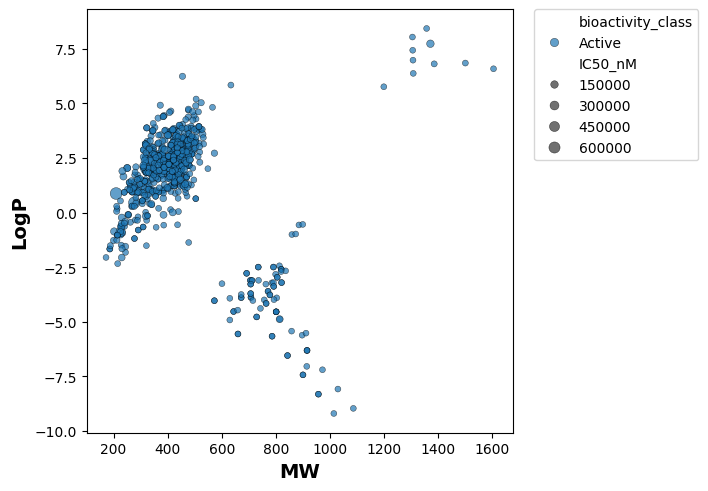

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x = "MW", y = 'logP', data = df, hue = 'bioactivity_class', size = "IC50_nM", edgecolor = 'black', alpha= 0.7)

plt.xlabel('MW', fontsize = 14, fontweight = 'bold')

plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad =0)

plt.savefig('plot_MW_vs_LogP.pdf')

#

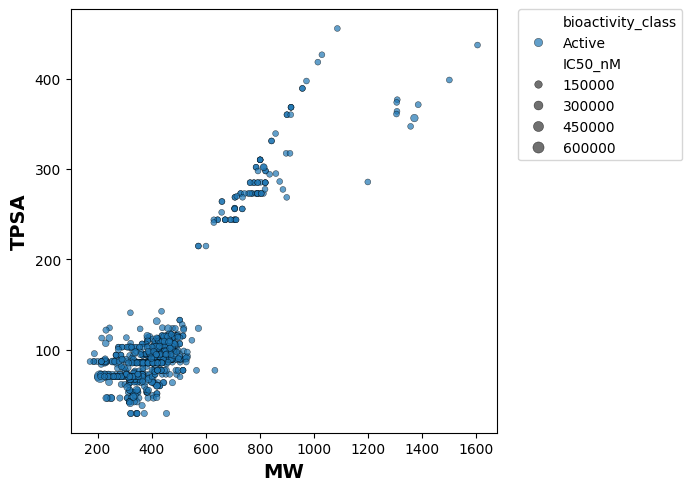

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.scatterplot(x= "MW", y="TPSA", data=df, hue="bioactivity_class", size = "IC50_nM", edgecolor= "black", alpha=0.7)

plt.xlabel("MW", fontsize = 14, fontweight="bold")
plt.ylabel("TPSA", fontsize = 14, fontweight= "bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig("plot_TPSA_vs_MW.pdf")

# Vamos a hacer una grafica de cajas

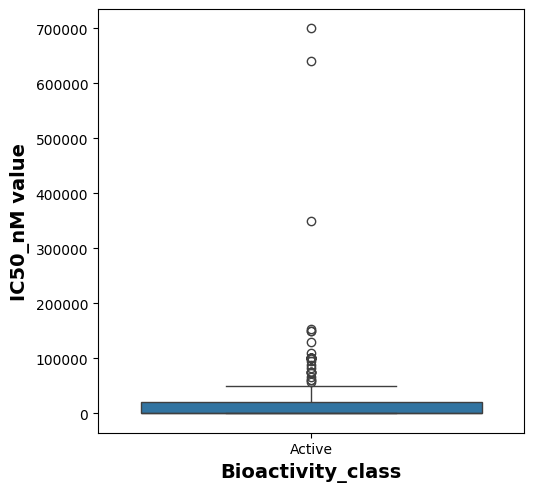

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x= "bioactivity_class", y = "IC50_nM", data = df)

plt.xlabel("Bioactivity_class", fontsize=14, fontweight="bold")
plt.ylabel("IC50_nM value", fontsize=14, fontweight="bold")

plt.savefig("plot_ic50.pdf")

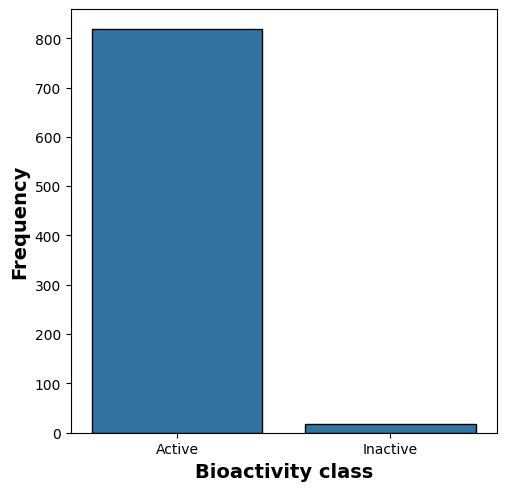

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.countplot(x="bioactivity_class", data= df, edgecolor="black")

plt.xlabel("Bioactivity class", fontsize= 14, fontweight="bold")

plt.ylabel("Frequency", fontsize=14, fontweight="bold")

plt.savefig("plot_bioactivity_class.pdf")

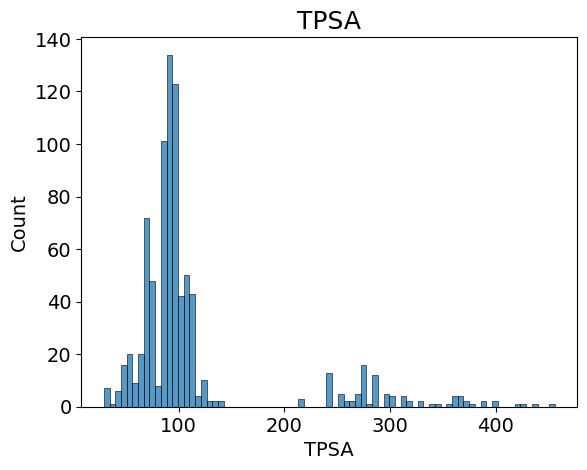

In [ ]:
df_FAP = df [df['bioactivity_class']== 'Active']
hist = sns.histplot (x= 'TPSA', data = df_FAP)

hist.axes.set_title('TPSA', fontsize = 18)

hist.set_xlabel('TPSA', fontsize=14)

hist.set_ylabel('Count', fontsize=14)

hist.tick_params(labelsize=14)

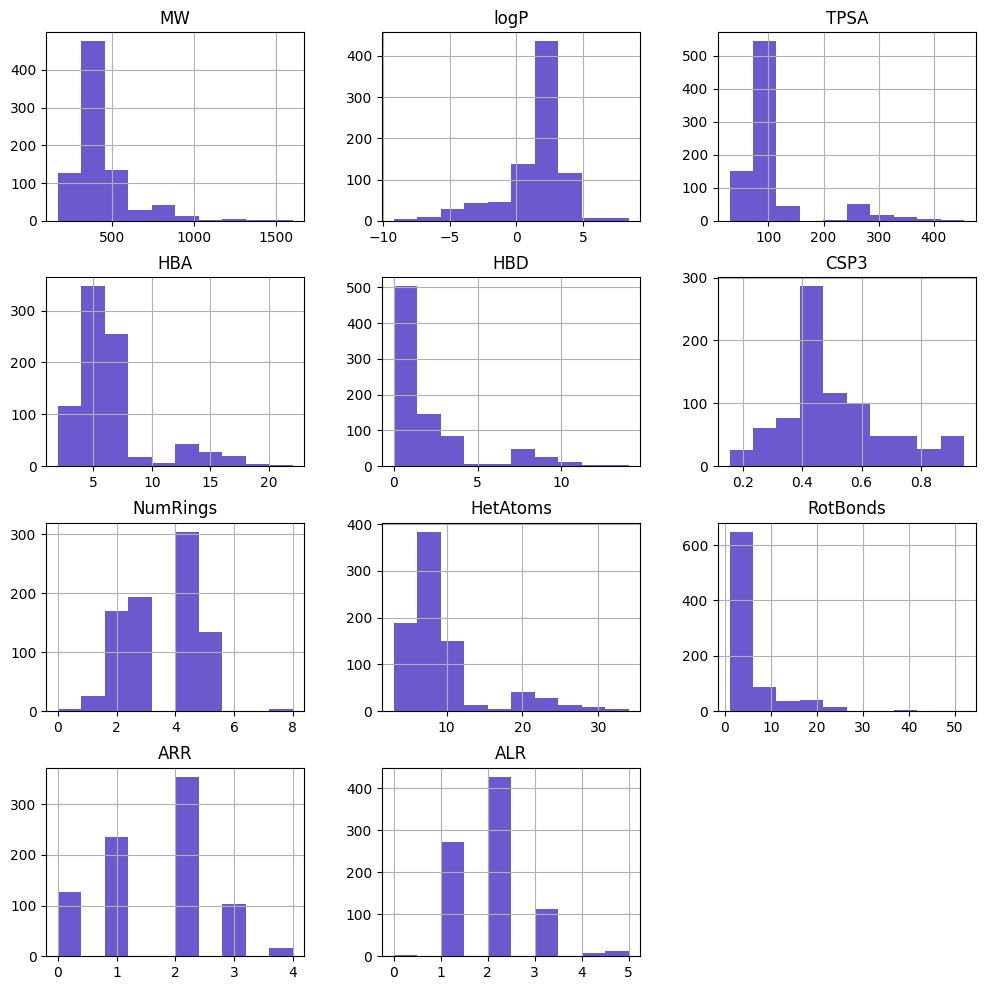

<Figure size 640x480 with 0 Axes>

In [ ]:
df_FAP_descriptors= df[['MW','logP','TPSA','HBA','HBD','CSP3','NumRings','HetAtoms','RotBonds','ROMol','ARR','ALR']]
#Histograma
df_FAP_descriptors.hist(figsize=(12,12), color="slateblue")
plt.show()
plt.savefig('mol_desc_dist.pdf')

In [ ]:
import numpy as np

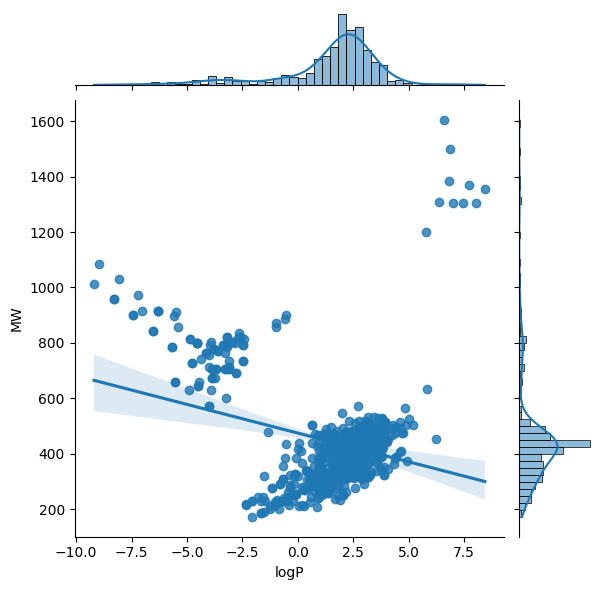

In [ ]:
joint_plt = sns.jointplot (x = 'logP', y = 'MW', data = df, kind = 'reg')

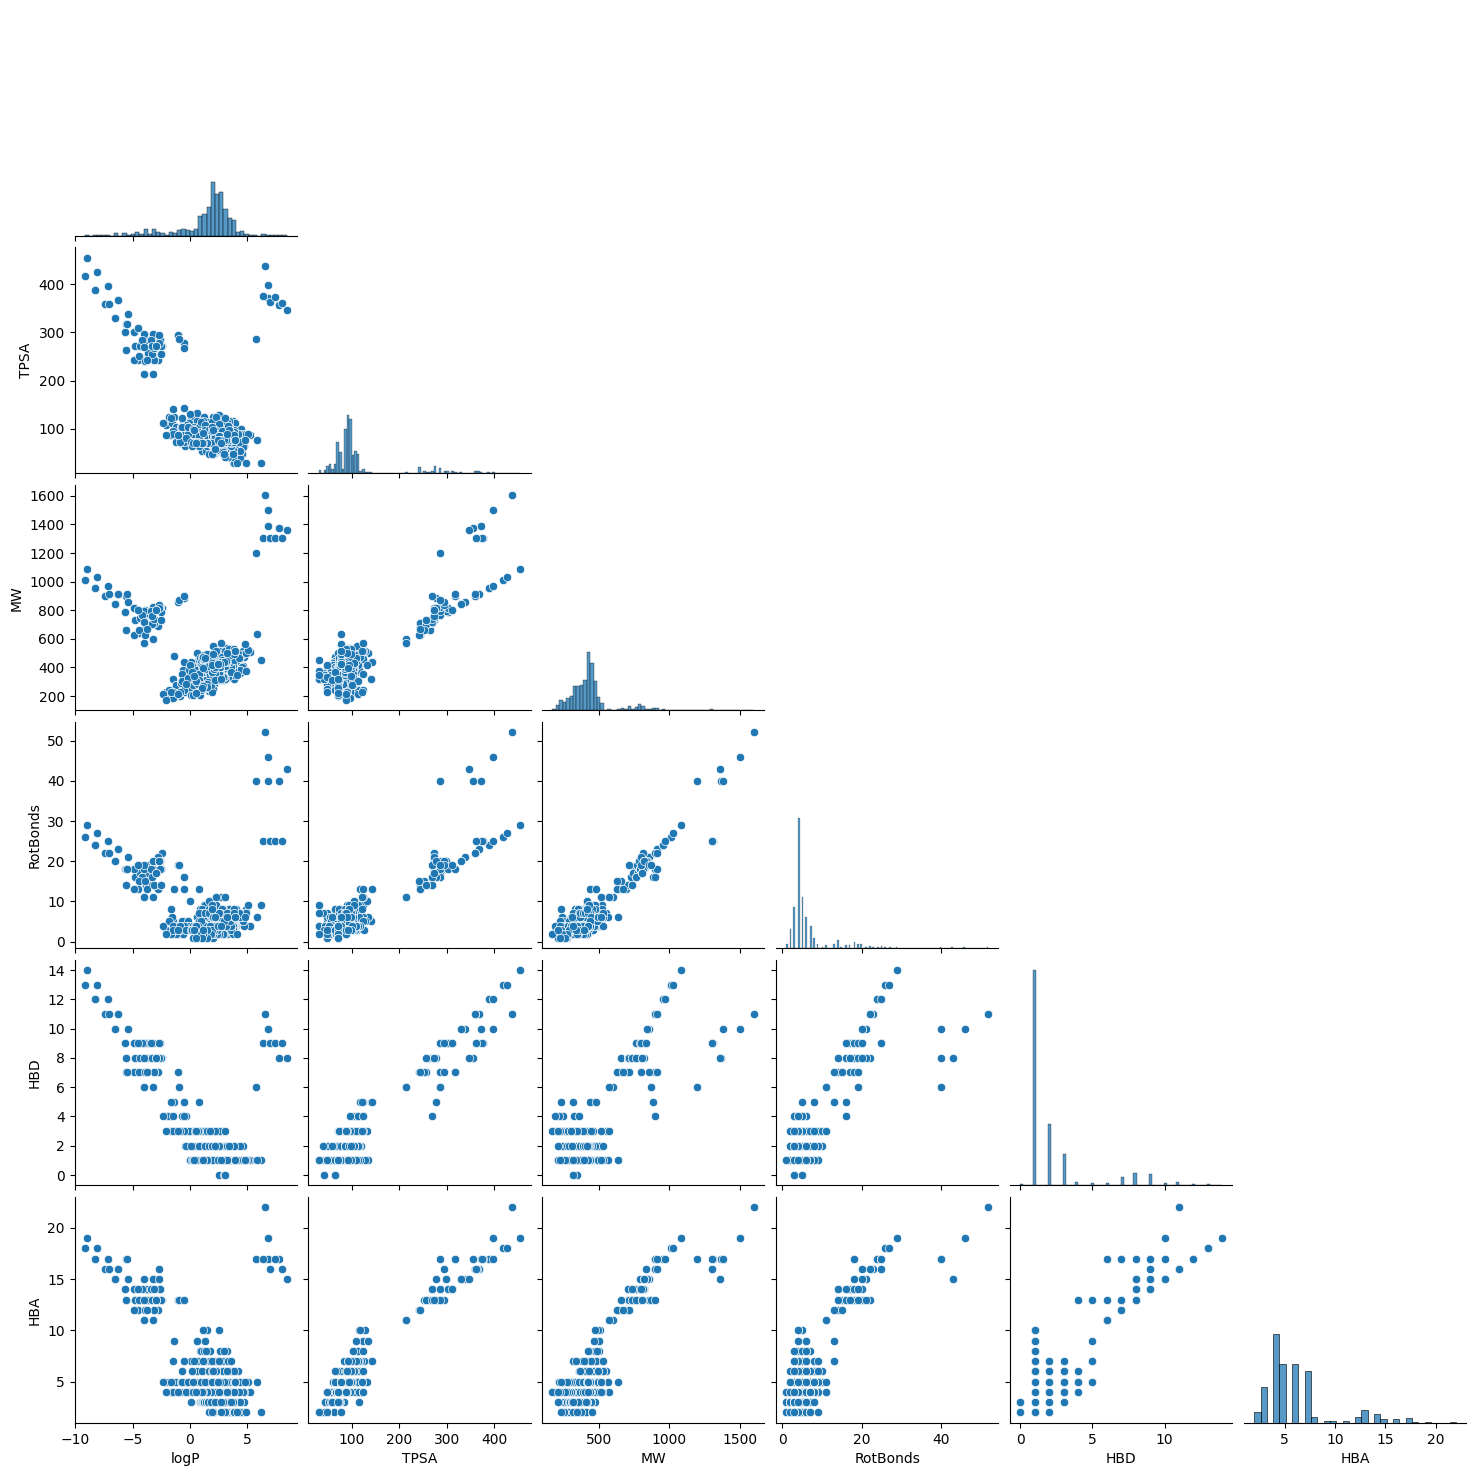

In [ ]:
sns.pairplot(df[['logP', 'TPSA', 'MW', 'RotBonds','HBD','HBA']], corner = 'True')
# corner = 'True' omite la representacion de la mitad superior de la matriz

In [ ]:
#Importar la  función PearsonR del módulo "stats" de la librería SciPy
from scipy.stats import pearsonr
#Definir una función para obtener la correlación entre dos variables
def get_corr(col1, col2, temp_df):
    pearson_corr, p_value = pearsonr(temp_df[col1], temp_df[col2])
    print("La correlación entre {} y {} es {:.2f}".format(col1, col2, pearson_corr))
    print("El valor-P de esta correlación es {:.^e}".format(p_value))
#Usamos la función para obtener la correlación entre logP y TPSA
get_corr('TPSA', 'MW', df)

La correlación entre TPSA y MW es 0.90
El valor-P de esta correlación es 2.807594e-290


In [ ]:
PandasTools.AddMurckoToFrame(df, 'ROMol')

df[['Smiles', 'Murcko_SMILES']]
df.to_csv("Murko_Notation", index = False)

,BindingDB_id,Smiles,bioactivity_class,IC50_nM,Data Set,Smiles standarization,ROMol,MW,HBA,HBD,logP,TPSA,CSP3,NumRings,RotBonds,Murcko_SMILES,scaffold
0,1297087,CC(C)[C@H](C(N[C@@H](C)C(N1[C@@H](B(O)O)CCC1)=...,Active,62.0,Bsite,Nope,,671.558,12,7,-3.88970,243.83,0.785714,2,14,O=C(CNC(=O)CN1CCNCCNCCNCC1)NCC(=O)N1CCCC1,
1,1297088,OB(O)[C@H]1CCCN1C(=O)[C@H](C)NC(=O)[C@H](NC(=O...,Active,26.2,Bsite,Nope,,671.558,12,7,-3.88970,243.83,0.785714,2,14,O=C(CNC(=O)CN1CCNCCNCCNCC1)NCC(=O)N1CCCC1,
2,1297089,C[C@@H](C(N1[C@@H](B(O)O)CCC1)=O)NC([C@@H](CO)...,Active,186.0,Bsite,Nope,,659.503,13,8,-5.55340,264.06,0.769231,2,14,O=C(CNC(=O)CN1CCNCCNCCNCC1)NCC(=O)N1CCCC1,
3,1297090,OB(O)[C@H]1CCCN1C(=O)[C@H](C)NC(=O)[C@H](NC(=O...,Active,128.0,Bsite,Nope,,659.503,13,8,-5.55340,264.06,0.769231,2,14,O=C(CNC(=O)CN1CCNCCNCCNCC1)NCC(=O)N1CCCC1,
4,1297091,C[C@H](C(N[C@@H](C)C(N1[C@@H](B(O)O)CCC1)=O)=O...,Active,71.7,Bsite,Nope,,643.504,12,7,-4.52580,243.83,0.769231,2,13,O=C(CNC(=O)CN1CCNCCNCCNCC1)NCC(=O)N1CCCC1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,51084557,N[C@@H](Cc(cc1)ccc1-c1ccccc1)C(N(CCC1)[C@@H]1C...,Active,1410.0,Bsite,Nope,,319.408,3,1,2.73798,70.12,0.300000,3,4,O=C(CCc1ccc(-c2ccccc2)cc1)N1CCCC1,
814,1297226,OB(O)[C@H]1CCCN1C(=O)[C@H](C)NC(=O)[C@H](NC(=O...,Active,65.0,Bsite,Nope,,804.708,13,8,-2.95970,272.93,0.638889,3,17,O=C(CNC(=O)c1ccc(CNC(=O)CN2CCNCCNCCNCC2)cc1)NC...,
815,1297219,C[C@@H](C(N1[C@@H](B(O)O)CCC1)=O)NC(c(cc1)cnc1...,Active,8.8,Bsite,Nope,,1305.348,17,9,7.43090,373.84,0.400000,8,25,O=C(CCCCCC1=C(/C=C/C2=C(Oc3ccccc3)C(=C/C=C3\Cc...,
816,1297222,C[C@@H](C(N1[C@@H](B(O)O)CCC1)=O)NC(c(cc1)ccc1...,Active,1.7,Bsite,Nope,,1304.360,16,9,8.03590,360.95,0.393443,8,25,O=C(CCCCCC1=C(/C=C/C2=C(Oc3ccccc3)C(=C/C=C3\Cc...,

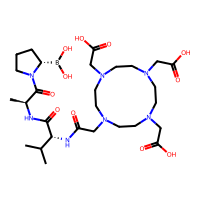
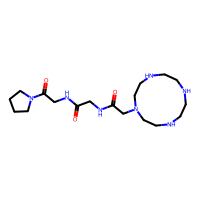
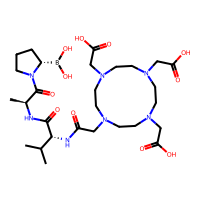
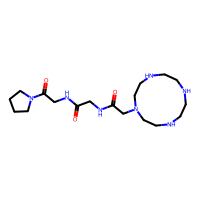
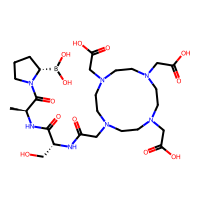
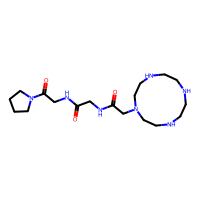
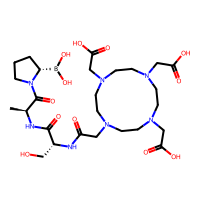
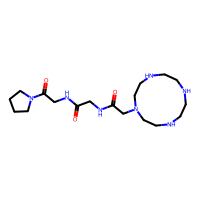
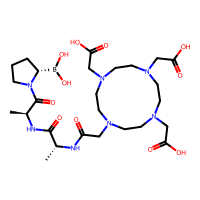
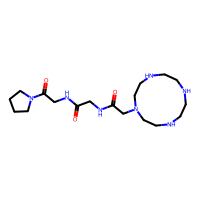
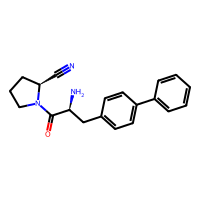
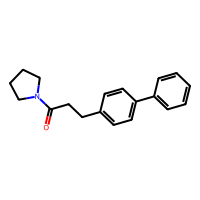
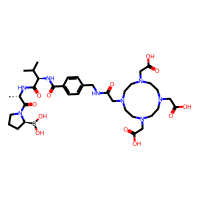
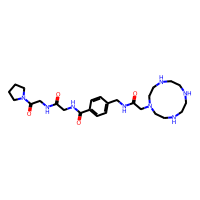
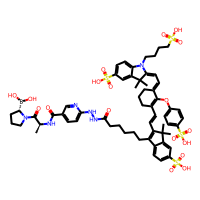
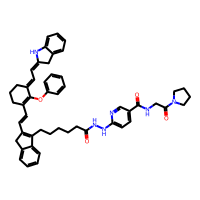
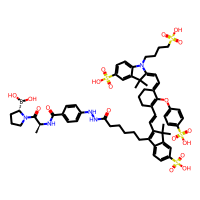
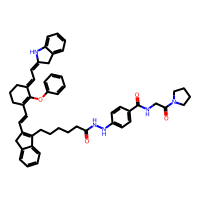
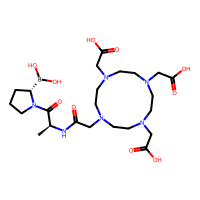
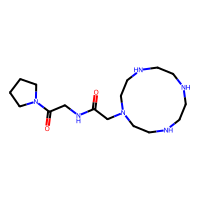

In [ ]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol= 'Murcko_SMILES', molCol= 'scaffold')

df

In [ ]:
df_b= df.copy()
#Eliminar columnas tipo Mol
df_b.drop("ROMol", axis=1, inplace=True)
df_b.drop("scaffold", axis=1, inplace=True)

In [ ]:
#Conservar columnas seleccionadas
df_b = df_b[['Smiles','Murcko_SMILES', 'MW','HBD','HBA','TPSA','RotBonds',
             'logP', 'CSP3', 'NumRings']]

In [ ]:
#Visualizar copia del dataframe
print(f"DataFrame shape: {df_b.shape}")
df_b.head(2)

DataFrame shape: (818, 10)


,Smiles,Murcko_SMILES,MW,HBD,HBA,TPSA,RotBonds,logP,CSP3,NumRings
0,CC(C)[C@H](C(N[C@@H](C)C(N1[C@@H](B(O)O)CCC1)=...,O=C(CNC(=O)CN1CCNCCNCCNCC1)NCC(=O)N1CCCC1,671.558,7,12,243.83,14,-3.8897,0.785714,2
1,OB(O)[C@H]1CCCN1C(=O)[C@H](C)NC(=O)[C@H](NC(=O...,O=C(CNC(=O)CN1CCNCCNCCNCC1)NCC(=O)N1CCCC1,671.558,7,12,243.83,14,-3.8897,0.785714,2


In [ ]:
#Agrupar datos por scaffold y contarlos
amount = df_b.groupby(['Murcko_SMILES']).size()
print(f"Dataset with {amount.shape[0]} different entries:",amount.sort_values(ascending=False))
#Nuevo dataframe con SMILES de scaffolds y su conteo, ordenados de mayor a menor
df_sca_all = pd.DataFrame (amount, columns = ['Amount'] )
df_sca_all=df_sca_all.sort_values(by='Amount', ascending= False)
df_sca_all=df_sca_all.reset_index(level=None, drop=False)
print ('All:', df_sca_all.shape, df_sca_all.columns)
df_sca_all

Dataset with 331 different entries: Murcko_SMILES
O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CCOCC3)cc12          39
O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CCC3)cc12            37
O=C(NCC(=O)N1CC[C@@H]2C[C@@H]21)c1ccnc2ccccc12       34
O=C(CCc1ccccc1)N1CCCC1                               27
C1CCNC1                                              23
                                                     ..
O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4(COC4)C3)cc12      1
O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4CC(C3)O4)cc12      1
O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4CCC(C3)O4)cc12     1
O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4CCCC4C3)cc12       1
O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3C4CCC3CC4)cc12        1
Length: 331, dtype: int64
All: (331, 2) Index(['Murcko_SMILES', 'Amount'], dtype='object')


,Murcko_SMILES,Amount
0,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CCOCC3)cc12,39
1,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CCC3)cc12,37
2,O=C(NCC(=O)N1CC[C@@H]2C[C@@H]21)c1ccnc2ccccc12,34
3,O=C(CCc1ccccc1)N1CCCC1,27
4,C1CCNC1,23
...,...,...
326,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4(COC4)C3)cc12,1
327,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4CC(C3)O4)cc12,1
328,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4CCC(C3)O4)cc12,1
329,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4CCCC4C3)cc12,1


In [ ]:
#El dataframe cuenta con moléculas sin scaffold (moléculas lineales con fila vacía), anotamos en la línea la leyenda "Linear molecule":
df_sca_all.at[1, 'Murcko_SMILES']='Linear molecule'

In [ ]:
#Añadir columna de frecuencia, considerar el número total de registros para el cálculo.
df_sca_all.reset_index(drop=True, inplace=True)
df_sca_all["Frecuency"] = (df_sca_all['Amount'] / 1677)*100
print(f"Total Frecuency in Database: {sum(df_sca_all['Frecuency'])}, different entries:{sum(df_sca_all['Amount'])}, different Murcko Smiles:",
      len(df_sca_all['Murcko_SMILES']) )
df_sca_all = df_sca_all[['Murcko_SMILES', 'Amount', 'Frecuency']]
df_sca_all

Total Frecuency in Database: 48.77757901013673, different entries:818, different Murcko Smiles: 331


,Murcko_SMILES,Amount,Frecuency
0,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CCOCC3)cc12,39,2.325581
1,Linear molecule,37,2.206321
2,O=C(NCC(=O)N1CC[C@@H]2C[C@@H]21)c1ccnc2ccccc12,34,2.027430
3,O=C(CCc1ccccc1)N1CCCC1,27,1.610018
4,C1CCNC1,23,1.371497
...,...,...,...
326,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4(COC4)C3)cc12,1,0.059630
327,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4CC(C3)O4)cc12,1,0.059630
328,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4CCC(C3)O4)cc12,1,0.059630
329,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4CCCC4C3)cc12,1,0.059630


[17:14:19] SMILES Parse Error: syntax error while parsing: Linear
[17:14:19] SMILES Parse Error: Failed parsing SMILES 'Linear' for input: 'Linear'


,Murcko_SMILES,Amount,Frecuency,ROMol
0,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CCOCC3)cc12,39,2.325581,

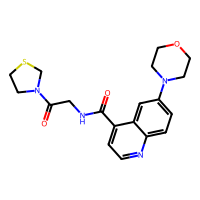

In [ ]:
#Añadir columna tipo Mol al dataframe con frecuencias de scaffolds
PandasTools.AddMoleculeColumnToFrame(df_sca_all, smilesCol='Murcko_SMILES')
df_sca_all[0:1]

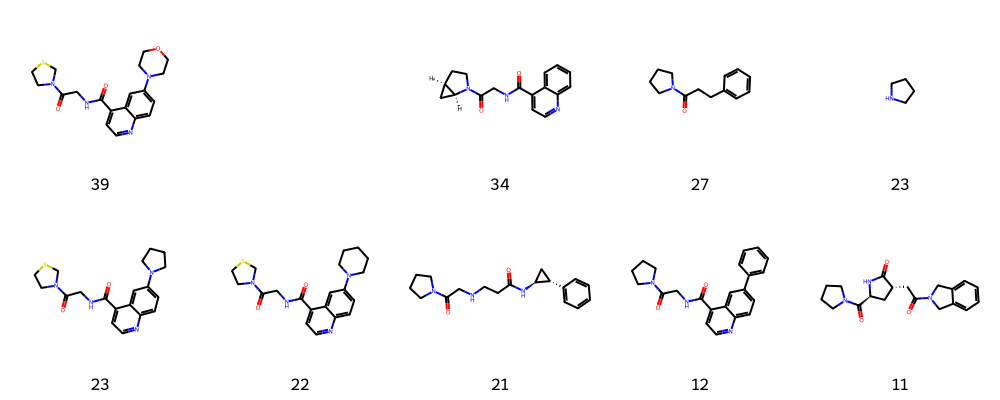

In [ ]:
#Visualizar scaffolds con su conteo
PandasTools.FrameToGridImage(df_sca_all[0:10], column='ROMol', legendsCol='Amount', molsPerRow=5)

,Murcko_SMILES,Amount,Frecuency,ROMol
0,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CCOCC3)cc12,39,2.325581,
1,Linear molecule,37,2.206321,None
2,O=C(NCC(=O)N1CC[C@@H]2C[C@@H]21)c1ccnc2ccccc12,34,2.027430,
3,O=C(CCc1ccccc1)N1CCCC1,27,1.610018,
4,C1CCNC1,23,1.371497,
...,...,...,...,...
326,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4(COC4)C3)cc12,1,0.059630,
327,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4CC(C3)O4)cc12,1,0.059630,
328,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4CCC(C3)O4)cc12,1,0.059630,
329,O=C(NCC(=O)N1CCSC1)c1ccnc2ccc(N3CC4CCCC4C3)cc12,1,0.059630,

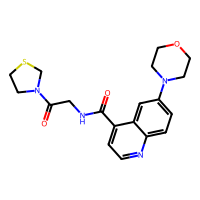
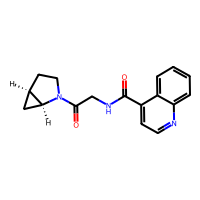
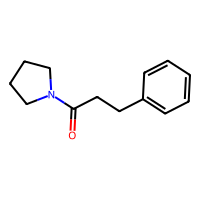
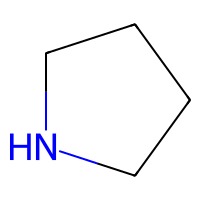
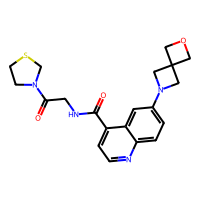
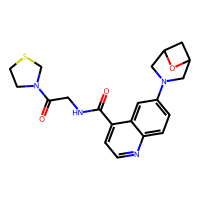
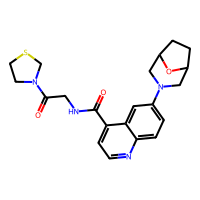
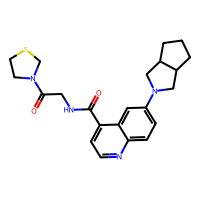
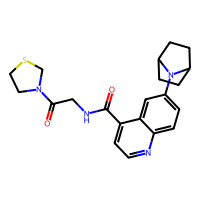

In [ ]:
df_sca_all

In [ ]:
#Importar módulos necesarios:
import os
from rdkit.Chem import RDConfig
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerator
[17:14:52] DEPRECATION WARNING: please use MorganGenerat

,BindingDB_id,Smiles,bioactivity_class,IC50_nM,Data Set,Smiles standarization,ROMol,MW,HBA,HBD,logP,TPSA,CSP3,NumRings,RotBonds,Murcko_SMILES,scaffold,SA
0,1297087,CC(C)[C@H](C(N[C@@H](C)C(N1[C@@H](B(O)O)CCC1)=...,Active,62.0,Bsite,Nope,,671.558,12,7,-3.88970,243.83,0.785714,2,14,O=C(CNC(=O)CN1CCNCCNCCNCC1)NCC(=O)N1CCCC1,,4.370186
1,1297088,OB(O)[C@H]1CCCN1C(=O)[C@H](C)NC(=O)[C@H](NC(=O...,Active,26.2,Bsite,Nope,,671.558,12,7,-3.88970,243.83,0.785714,2,14,O=C(CNC(=O)CN1CCNCCNCCNCC1)NCC(=O)N1CCCC1,,4.370186
2,1297089,C[C@@H](C(N1[C@@H](B(O)O)CCC1)=O)NC([C@@H](CO)...,Active,186.0,Bsite,Nope,,659.503,13,8,-5.55340,264.06,0.769231,2,14,O=C(CNC(=O)CN1CCNCCNCCNCC1)NCC(=O)N1CCCC1,,4.365730
3,1297090,OB(O)[C@H]1CCCN1C(=O)[C@H](C)NC(=O)[C@H](NC(=O...,Active,128.0,Bsite,Nope,,659.503,13,8,-5.55340,264.06,0.769231,2,14,O=C(CNC(=O)CN1CCNCCNCCNCC1)NCC(=O)N1CCCC1,,4.365730
4,1297091,C[C@H](C(N[C@@H](C)C(N1[C@@H](B(O)O)CCC1)=O)=O...,Active,71.7,Bsite,Nope,,643.504,12,7,-4.52580,243.83,0.769231,2,13,O=C(CNC(=O)CN1CCNCCNCCNCC1)NCC(=O)N1CCCC1,,4.320622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,51084557,N[C@@H](Cc(cc1)ccc1-c1ccccc1)C(N(CCC1)[C@@H]1C...,Active,1410.0,Bsite,Nope,,319.408,3,1,2.73798,70.12,0.300000,3,4,O=C(CCc1ccc(-c2ccccc2)cc1)N1CCCC1,,2.740579
814,1297226,OB(O)[C@H]1CCCN1C(=O)[C@H](C)NC(=O)[C@H](NC(=O...,Active,65.0,Bsite,Nope,,804.708,13,8,-2.95970,272.93,0.638889,3,17,O=C(CNC(=O)c1ccc(CNC(=O)CN2CCNCCNCCNCC2)cc1)NC...,,4.556998
815,1297219,C[C@@H](C(N1[C@@H](B(O)O)CCC1)=O)NC(c(cc1)cnc1...,Active,8.8,Bsite,Nope,,1305.348,17,9,7.43090,373.84,0.400000,8,25,O=C(CCCCCC1=C(/C=C/C2=C(Oc3ccccc3)C(=C/C=C3\Cc...,,5.680456
816,1297222,C[C@@H](C(N1[C@@H](B(O)O)CCC1)=O)NC(c(cc1)ccc1...,Active,1.7,Bsite,Nope,,1304.360,16,9,8.03590,360.95,0.393443,8,25,O=C(CCCCCC1=C(/C=C/C2=C(Oc3ccccc3)C(=C/C=C3\Cc...,,5.622295

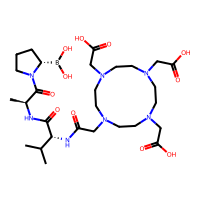
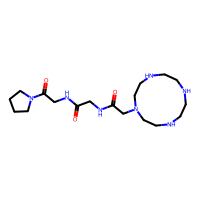
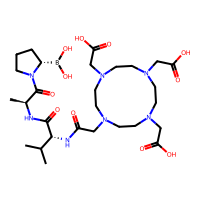
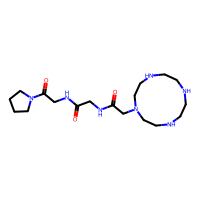
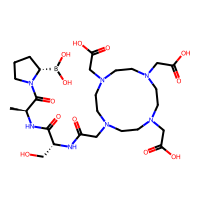
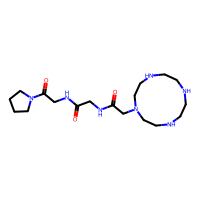
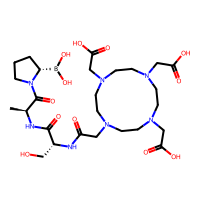
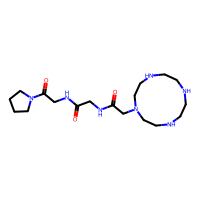
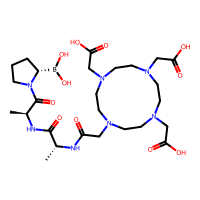
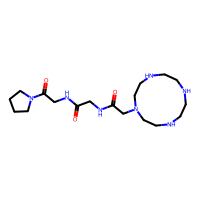
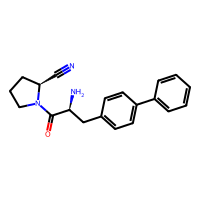
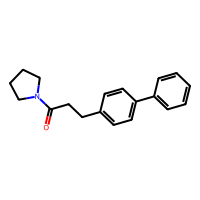
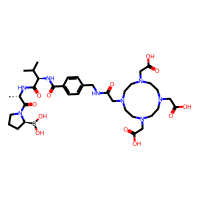
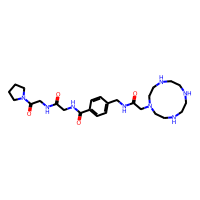
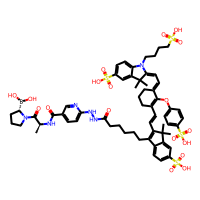
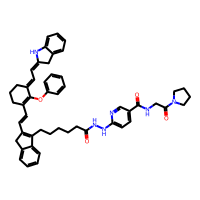
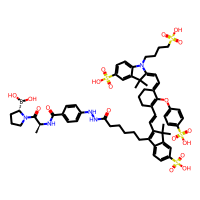
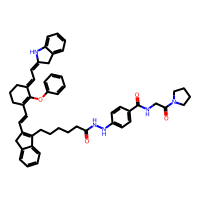
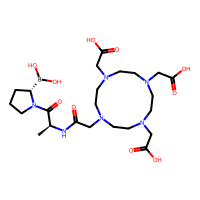
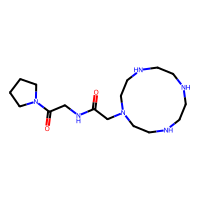

In [ ]:
#Calcular SAscore
SAlist = []

for mol in df['ROMol']:
    SA = sascorer.calculateScore(mol)
    SAlist.append(SA)
df['SA']=SAlist
df

<ipython-input-45-ef9b43ee86c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="bioactivity_class", y="SA", data=df, palette="Blues")


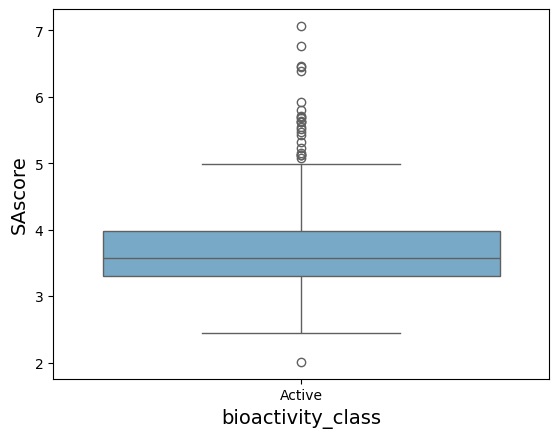

In [ ]:
#Graficar boxplot
ax = sns.boxplot(x="bioactivity_class", y="SA", data=df, palette="Blues")
#Título de ejes
plt.xlabel('bioactivity_class', size=14)
plt.ylabel('SAscore', size=14)
plt.savefig('SAscore_vs_bioactivity_class.pdf')

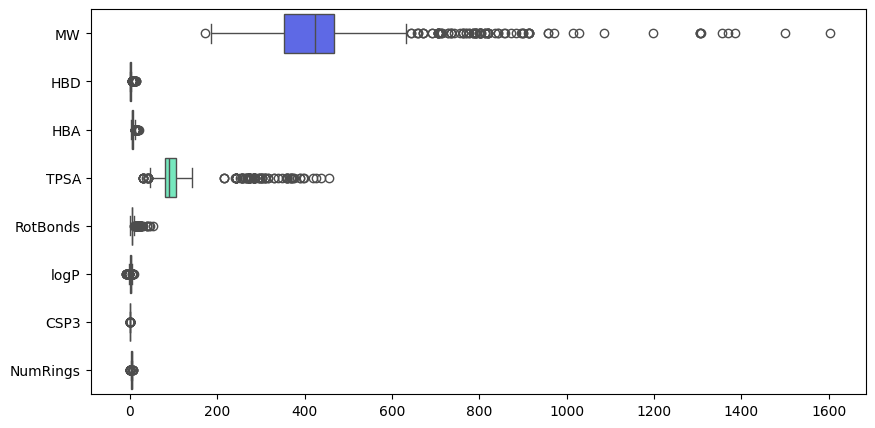

In [ ]:
df_Active = df [df['bioactivity_class']== 'Active']
df_Active_descriptors = df_Active[['MW','HBD','HBA','TPSA','RotBonds','logP', 'CSP3', 'NumRings']]
#Graficamos boxplots para todas las variables:
ax = sns.boxplot(data=df_Active_descriptors, orient="h", palette="rainbow")
#Especificamos tamaño de la figura con Matplotlib:
plt.gcf().set_size_inches(10, 5)
plt.show()

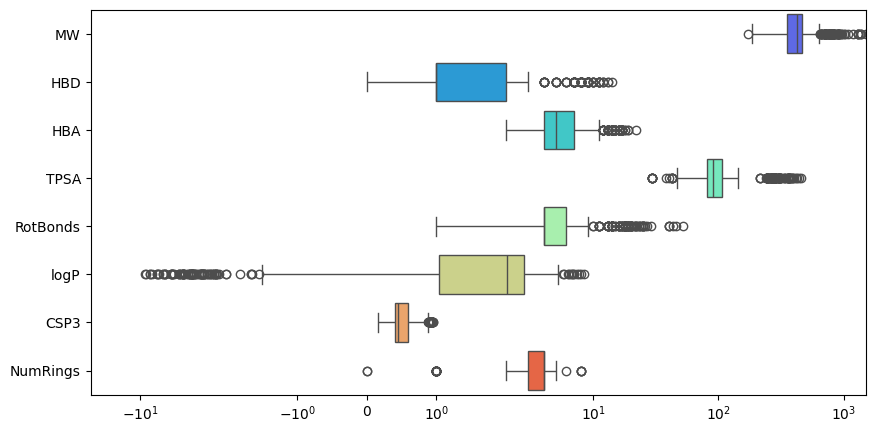

In [ ]:
#Vuelvo a graficar los boxplots:
ax = sns.boxplot(data=df_Active_descriptors, orient="h", palette="rainbow")
#Eje x en escala logarítmica:
ax.set_xscale('symlog')
#Especifico desde dónde hasta dónde quiero que me grafique el eje x:
ax.axis(xmin=-25, xmax=1500)
#Tamaño de la figura:
plt.gcf().set_size_inches(10, 5)

<Axes: >

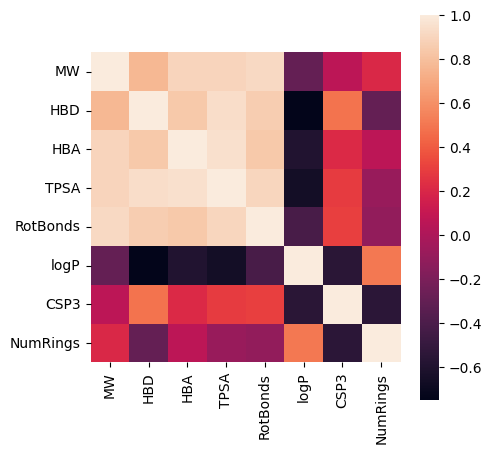

In [ ]:
# Calculamos la correlación con el coeficiente de Pearson usando Pandas:
correlation = df_Active_descriptors.corr(method='pearson')
# Creamos una nueva figura con Matplotlib y definimos el tamaño:
fig=plt.gcf()
fig.set_size_inches(5,5)
# Heatmap de correlación usando Seaborn:
sns.heatmap(correlation, annot=False,square=True)

In [ ]:
import numpy as np

<Axes: >

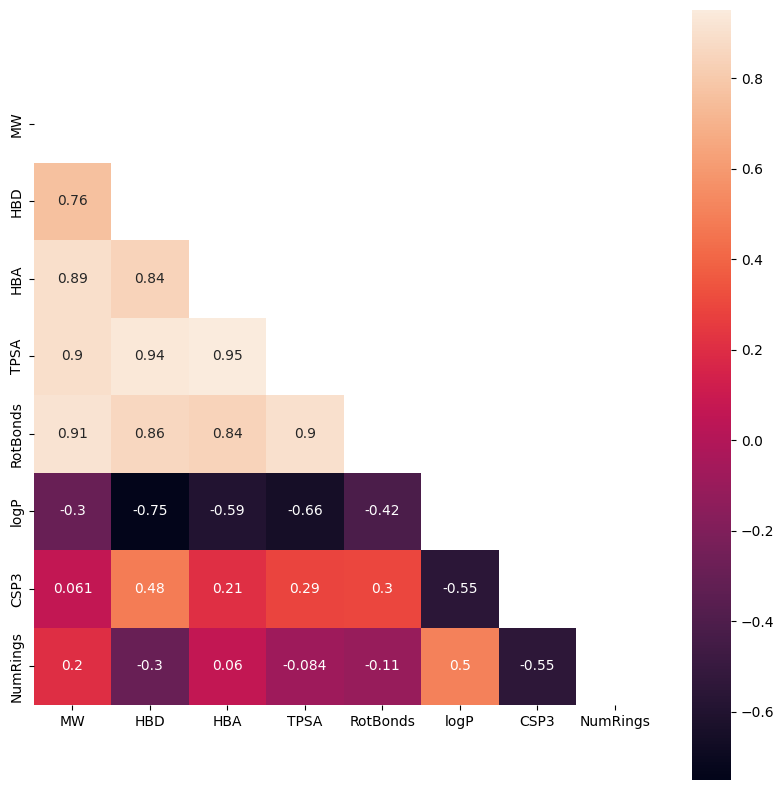

In [ ]:
#Calcular correlación
correlation = df_Active_descriptors.corr()
# np.triu es una función de Numpy que proporciona el triángulo superior de una matriz cuadrada
upper_triangle = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=upper_triangle,square=True,annot=True)

In [ ]:
pip -V

In [ ]:
#Instalar librería para raincloud plots, reiniciar la sesión si al final de la celda aparece la advertencia
!pip install ptitprince

In [ ]:
#Importar librerías necesarias después de reiniciar la sesión
import pandas as pd
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid") #Estilo predeterminado de las gráficas
import matplotlib.collections as clt

In [ ]:
#Graficar las "nubes"
f, ax = plt.subplots(figsize=(7, 5))
dy="bioactivity_class"; dx="SA"; ort="h"; pal = sns.color_palette(n_colors=1)

ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal,
      bw = .2, cut = 0.,scale = "area", width = .6, inner = None,
      orient = ort)